In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
CocaCola = pd.read_excel("D:\\DATA_science\\DATA_science assignment\\Forecasting\\CocaCola_Sales_Rawdata.xlsx", header = 0,
                       index_col = 0,
                     parse_dates = True)

In [6]:
CocaCola.head()

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996


In [7]:
CocaCola.shape

(42, 1)

In [8]:
CocaCola.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, Q1_86 to Q2_96
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   42 non-null     float64
dtypes: float64(1)
memory usage: 672.0+ bytes


In [9]:
CocaCola.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


## Visualizations

### Line plot

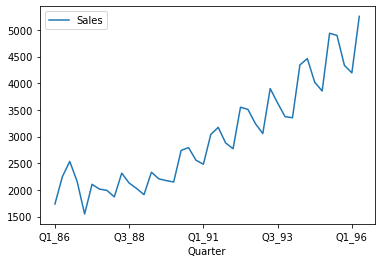

In [10]:
CocaCola.plot()
plt.show()

### Scatter plot

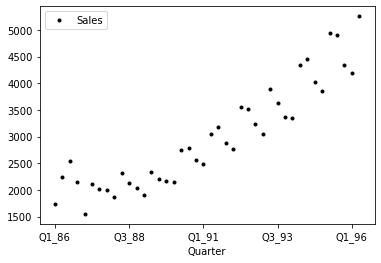

In [11]:
CocaCola.plot(style='k.')
plt.show()

### Histogram and density plot

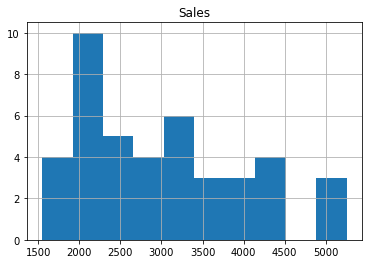

In [12]:
CocaCola.hist()
plt.show()

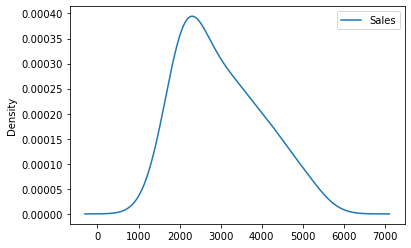

In [13]:
CocaCola.plot(kind = 'kde')
plt.show()

### Lag_plot

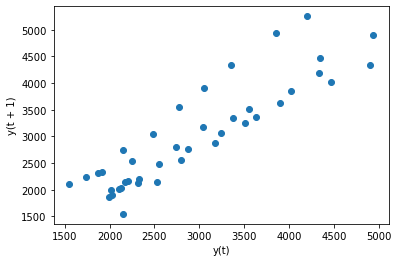

In [14]:
pd.plotting.lag_plot(CocaCola)
plt.show()

### Autocorrelation Plot

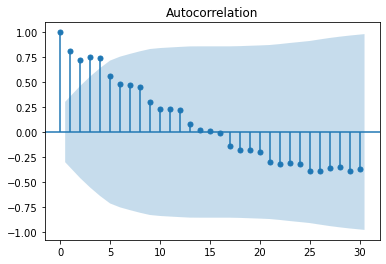

In [15]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(CocaCola,lags=30)
plt.show()

### Persistence Model

In [23]:
df = pd.read_excel("D:\\DATA_science\\DATA_science assignment\\Forecasting\\CocaCola_Sales_RawData.xlsx", header = 0, 
                     parse_dates = True)

In [24]:
df.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [26]:
df['t'] = df['Sales'].shift(1)

In [27]:
df.head()

,Quarter,Sales,t
0,Q1_86,1734.827000,NaN
1,Q2_86,2244.960999,1734.827000
2,Q3_86,2533.804993,2244.960999
3,Q4_86,2154.962997,2533.804993
4,Q1_87,1547.818996,2154.962997


In [28]:
train, test = df[1:30], df[30:]

In [29]:
train_x, train_y = train['t'], train['Sales']
test_x, test_y = test['t'], test['Sales']

In [30]:
predictions = test_x.copy()

In [31]:
print(predictions)
print(test_y)

30    3899.0
31    3629.0
32    3373.0
33    3352.0
34    4342.0
35    4461.0
36    4017.0
37    3854.0
38    4936.0
39    4895.0
40    4333.0
41    4194.0
Name: t, dtype: float64
30    3629.0
31    3373.0
32    3352.0
33    4342.0
34    4461.0
35    4017.0
36    3854.0
37    4936.0
38    4895.0
39    4333.0
40    4194.0
41    5253.0
Name: Sales, dtype: float64


In [33]:
import numpy as np
from sklearn.metrics import mean_squared_error as mse
mse = mse(test_y, predictions)
RMSE = np.sqrt(mse)
RMSE

576.3313572358642

In [34]:
import matplotlib.pyplot as plt

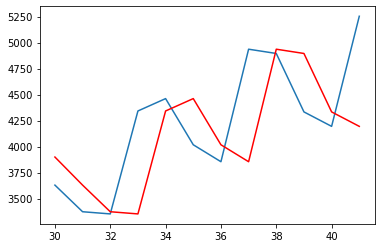

In [35]:
plt.plot(test_y)
plt.plot(predictions, color = 'red')
plt.show()

### Autoregression Model

In [37]:
df = pd.read_excel("D:\\DATA_science\\DATA_science assignment\\Forecasting\\CocaCola_Sales_RawData.xlsx", header = 0, 
                     parse_dates = True)
df.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [38]:
train, test = df.Sales[1:df.shape[0] - 12], df.Sales[df.shape[0] - 12:]

In [39]:
from statsmodels.tsa.ar_model import AR

In [40]:
model = AR(train)
model_fit = model.fit()

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


#### No. of Lag Variables

In [42]:
model_fit.k_ar    #  9 lag values are important

9

#### Coeff of Lag variables

In [43]:
model_fit.params

const       31.483564
L1.Sales     0.790622
L2.Sales    -0.035972
L3.Sales    -0.168003
L4.Sales     1.193360
L5.Sales    -0.840750
L6.Sales    -0.000715
L7.Sales     0.226051
L8.Sales    -0.126639
L9.Sales    -0.015705
dtype: float64

In [44]:
predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1)

In [45]:
predictions

30    3860.220008
31    3561.187113
32    3376.477049
33    4305.508685
34    4275.398278
35    3915.996704
36    3726.363555
37    4746.027552
38    4726.588607
39    4298.879229
40    4104.100525
41    5223.715252
dtype: float64

In [46]:
from sklearn.metrics import mean_squared_error as mse
mse = mse(test_y, predictions)
RMSE = np.sqrt(mse)
RMSE

137.326926942048

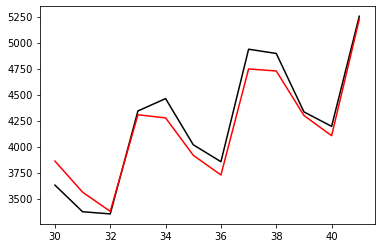

In [47]:
plt.plot(test_y, color = 'black')
plt.plot(predictions, color = 'red')
plt.show()

In [48]:
data = train;
predict = [];
for p in test:
    model = AR(data)
    model_fit = model.fit()
    y = model_fit.predict(start=len(data), end=len(data)+len(test)-1)
    print(y.values[0])
    predict.append(y.values[0])
    data = np.append(data, p)
    data = pd.Series(data)

3860.2200080390853
3330.1497494687483
3160.50773350915
4343.532188914095
3983.8764649411814
4199.535275546591
4015.6435439126726
4775.1876613783625
5095.009892149754
4385.320736795462
4240.543566736855
5460.346566266251


C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


In [49]:
predict

[3860.2200080390853,
 3330.1497494687483,
 3160.50773350915,
 4343.532188914095,
 3983.8764649411814,
 4199.535275546591,
 4015.6435439126726,
 4775.1876613783625,
 5095.009892149754,
 4385.320736795462,
 4240.543566736855,
 5460.346566266251]

In [50]:
from sklearn.metrics import mean_squared_error as mse
mse = mse(test.values, predict)
RMSE = np.sqrt(mse)
RMSE

202.6544736918663

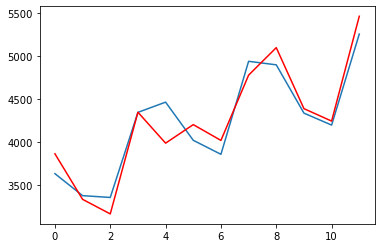

In [51]:
plt.plot(test.values)
plt.plot(predict, color = 'red')

### Moving Average model

In [56]:
df = pd.read_excel("D:\\DATA_science\\DATA_science assignment\\Forecasting\\CocaCola_Sales_RawData.xlsx", header = 0, 
                     parse_dates = True)
df.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [57]:
df['s'] = df['Sales'].shift(1)

In [58]:
df['Resid'] = df['Sales'] - df['s']

In [59]:
df.head()

,Quarter,Sales,s,Resid
0,Q1_86,1734.827000,NaN,NaN
1,Q2_86,2244.960999,1734.827000,510.133999
2,Q3_86,2533.804993,2244.960999,288.843994
3,Q4_86,2154.962997,2533.804993,-378.841995
4,Q1_87,1547.818996,2154.962997,-607.144001


In [60]:
train, test = df.Resid[1:df.shape[0] - 12], df.Resid[df.shape[0] - 12:]

In [61]:
from statsmodels.tsa.ar_model import AR

In [62]:
model = AR(train)
model_fit = model.fit()

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


In [63]:
model_fit.k_ar

9

In [64]:
model_fit.params

const       83.952412
L1.Resid    -0.246497
L2.Resid    -0.237152
L3.Resid    -0.489178
L4.Resid     0.793030
L5.Resid    -0.178900
L6.Resid    -0.053104
L7.Resid     0.255206
L8.Resid     0.045896
L9.Resid     0.185202
dtype: float64

In [65]:
pred_resid = model_fit.predict(start=len(train), end=len(train)+len(test)-1)

In [68]:
predictions = df.s[df.shape[0] - 12:] + pred_resid

In [69]:
from sklearn.metrics import mean_squared_error as mse
mse = mse(test_y, predictions)
RMSE = np.sqrt(mse)
RMSE

129.6463004095416

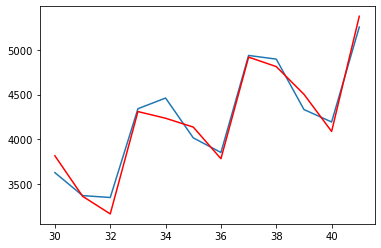

In [70]:
plt.plot(test_y)
plt.plot(predictions, color = 'red')

## Arima Model

In [71]:
df = pd.read_excel("D:\\DATA_science\\DATA_science assignment\\Forecasting\\CocaCola_Sales_RawData.xlsx", header = 0, 
                     parse_dates = True)
df.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


<AxesSubplot:>

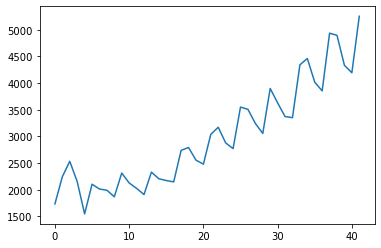

In [73]:
df['Sales'].plot()

#### Trend is polynomial
   D = 2

### Autocorrelation Parameters

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

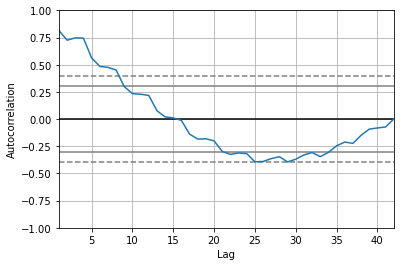

In [74]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])

### P = 7

### Partial Autocorrelation PLot

In [75]:
from statsmodels.graphics.tsaplots import plot_pacf

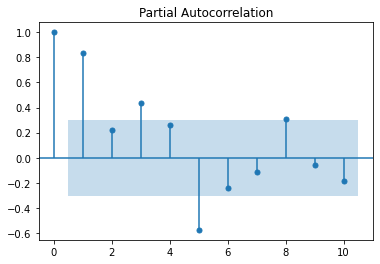

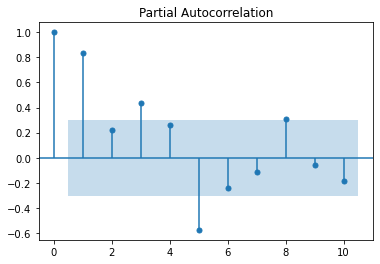

In [77]:
plot_pacf(df['Sales'], lags = 10)

#### q = 1

In [78]:
from statsmodels.tsa.arima_model import ARIMA

In [83]:
model = ARIMA(df['Sales'], order = (5,2,1))

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [84]:
model_fit = model.fit()

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:657: RuntimeWarning: overflow encountered in tanh
  newparams = np.tanh(params/2)
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:658: RuntimeWarning: overflow encountered in tanh
  tmp = np.tanh(params/2)
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this

In [85]:
model_fit.summary()

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1521: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D2.Sales   No. Observations:                   40
Model:                 ARIMA(5, 2, 1)   Log Likelihood                -369.015
Method:                       css-mle   S.D. of innovations           2650.290
Date:                Fri, 23 Apr 2021   AIC                            754.031
Time:                        19:33:17   BIC                            767.542
Sample:                             2   HQIC                           758.916
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              5.4326   1.53e-06   3.55e+06      0.000       5.433       5.433
ar.L1.D2.Sales    -1.0000   1.39e-06  -7.18e+05      0.000      -1.000      -1.000
ar.L2.D2.Sales     2.0000   1.72e-06   1.16e+06      0.000       2.000       2.000
ar.L3.D2.Sales     2.0000   1.23e-06   1.63e+06      0.000       2.000       2.000
ar.L4.D2.Sales    -1.0000   2.63e-07   -3.8e+06      0.000      -1.000      -1.000
ar.L5.D2.Sales    -1.0000   2.32e-07  -4.31e+06      0.000      -1.000      -1.000
ma.L1.D2.Sales     0.3000        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0000           -0.0018j            1.0000           -0.0003
AR.2            1.0000           +0.0018j            1.0000            0.0003
AR.3           -1.0000           -0.0000j            1.0000           -0.5000
AR.4           -1.0000           +0.0000j            1.0000            0.5000
AR.5           -1.0000           -0.0000j            1.0000           -0.5000
MA.1           -3.3332           +0.0000j            3.3332            0.5000
-----------------------------------------------------------------------------
"""

In [86]:
residuals = model_fit.resid

<AxesSubplot:>

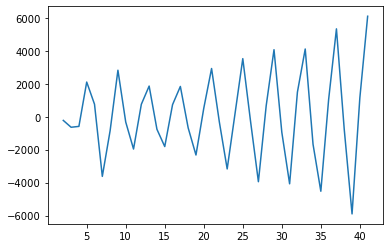

In [87]:
residuals.plot()

In [88]:
residuals.describe()

count      40.000000
mean       61.394797
std      2660.476414
min     -5898.360581
25%     -1125.942379
50%      -265.379784
75%      1575.154200
max      6091.309458
dtype: float64

In [89]:
output = model_fit.forecast()

In [90]:
output

(array([6623.45102531]),
 array([2650.28997449]),
 array([[ 1428.97812672, 11817.92392389]]))

In [91]:
model_fit.forecast(5)

(array([ 6623.45102531, 12568.43629864, 17055.75908284, 31151.66904614,
        40363.2229013 ]),
 array([ 2650.28997449,  4346.8118195 , 12197.09588817, 18403.79167466,
        34925.48870639]),
 array([[  1428.97812672,  11817.92392389],
        [  4048.84168485,  21088.03091243],
        [ -6850.10957395,  40961.62773962],
        [ -4919.09981517,  67222.43790744],
        [-28089.47710567, 108815.92290828]]))

In [92]:
train_size = int(df.shape[0]*0.7)

In [93]:
train, test = df.Sales[0:train_size], df.Sales[train_size:]

In [94]:
test.shape

(13,)

In [102]:
data = train
predict = []
for p in test:
    model = ARIMA(data, order=(5, 1, 0))
    model_fit = model.fit()
    y = model_fit.forecast()
    print(y[0][0])
    predict.append(y[0][0])
    data = np.append(data, p)
    data = pd.Series(data)

3734.2245022127045
3782.620891288386
3355.125969260378
3297.21812012312
4112.813890894753
3961.0436784836593
4130.787224605605
3912.794181884271
4687.0437326573665
4970.516923768959
4384.040534181371
4207.687405001482
5261.673039740938


C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [103]:
predict

[3734.2245022127045,
 3782.620891288386,
 3355.125969260378,
 3297.21812012312,
 4112.813890894753,
 3961.0436784836593,
 4130.787224605605,
 3912.794181884271,
 4687.0437326573665,
 4970.516923768959,
 4384.040534181371,
 4207.687405001482,
 5261.673039740938]

In [104]:
from sklearn.metrics import mean_squared_error as mse
mse = mse(test.values, predict)
RMSE = np.sqrt(mse)
RMSE

184.7050651537994

## SARIMA or Seasonal ARIMA
#### SARIMA (p, d, q)(P, D, Q)m

In [105]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [106]:
df = pd.read_excel("D:\\DATA_science\\DATA_science assignment\\Forecasting\\CocaCola_Sales_RawData.xlsx", header = 0, 
                     parse_dates = True)
df.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [107]:
df.index = df['Quarter']
df.head()

,Quarter,Sales
Quarter,,
Q1_86,Q1_86,1734.827000
Q2_86,Q2_86,2244.960999
Q3_86,Q3_86,2533.804993
Q4_86,Q4_86,2154.962997
Q1_87,Q1_87,1547.818996


In [108]:
train_size = int(df.shape[0]*0.7)

In [109]:
train, test = df.Sales[0:train_size], df.Sales[train_size:]

In [124]:
#result_a = seasonal_decompose(df['Sales'], model = 'multiplicative')
#result_a.plot()

In [111]:
model = SARIMAX(df['Sales'], order = (1,1,1), seasonal_order = (1,1,1,4))

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [112]:
model_fit = model.fit()

In [113]:
residuals = model_fit.resid

<AxesSubplot:xlabel='Quarter'>

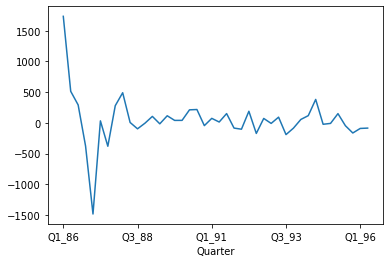

In [114]:
residuals.plot()

In [115]:
output = model_fit.forecast()

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [117]:
output

42    5322.611482
dtype: float64

In [116]:
model_fit.params

ar.L1          0.558902
ma.L1         -0.814143
ar.S.L4       -0.999090
ma.S.L4        0.980756
sigma2     23741.216621
dtype: float64

In [118]:
model_fit.forecast(4)

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


42    5322.611482
43    4733.548438
44    4530.066054
45    5578.747223
Name: predicted_mean, dtype: float64

In [119]:
yhat = model_fit.predict()
yhat

Quarter
Q1_86       0.000000
Q2_86    1730.277944
Q3_86    2240.048070
Q4_86    2530.230319
Q1_87    3029.415396
Q2_87    2070.321074
Q3_87    2393.486775
Q4_87    1710.712210
Q1_88    1377.174025
Q2_88    2305.745494
Q3_88    2223.759059
Q4_88    2030.702014
Q1_89    1803.973389
Q2_89    2345.253621
Q3_89    2089.651100
Q4_89    2132.378125
Q1_90    2106.259282
Q2_90    2525.895186
Q3_90    2574.064020
Q4_90    2599.547637
Q1_91    2406.156463
Q2_91    3024.187537
Q3_91    3019.709720
Q4_91    2962.436643
Q1_92    2873.603823
Q2_92    3359.701429
Q3_92    3678.613022
Q4_92    3170.416102
Q1_93    3063.311006
Q2_93    3804.712176
Q3_93    3818.325409
Q4_93    3457.824569
Q1_94    3294.950664
Q2_94    4223.157686
Q3_94    4078.137176
Q4_94    4038.443658
Q1_95    3861.379956
Q2_95    4784.260341
Q3_95    4939.782052
Q4_95    4496.205705
Q1_96    4283.202377
Q2_96    5336.743437
Name: predicted_mean, dtype: float64

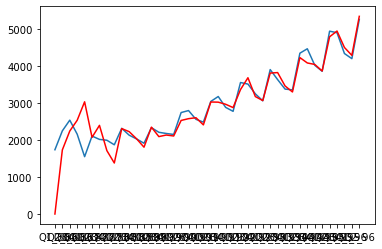

In [121]:
plt.plot(df['Sales'])
plt.plot(yhat, color = 'red')
plt.show()

In [123]:
from sklearn.metrics import mean_squared_error as mse
mse = mse(df['Sales'], yhat)
RMSE = np.sqrt(mse)
RMSE

399.2829259744844

### We are getting least RMSE value in Autoregressive Model. Therefore we use it for forecasting.
### RMSE = 137.326
### Dummy Variables = 9